# Fashion MNIST - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Tensorflow & Keras

In [2]:
import keras
keras.__version__

'2.4.3'

# I. Fashion MNIST Data_Set Load & Review

> ## 1) Load Fashion MNIST Data_set

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
# train_Data Information

print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])


60000
(60000, 28, 28)
60000
[9 0 0 3 0]


In [5]:
# Test_Data Information
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


> ## 2) Visualization

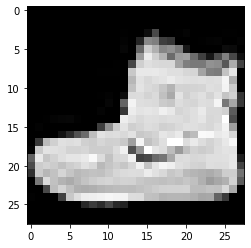

In [6]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [7]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

# II. Data Preprocessing

> ## Reshape and Normalization

In [8]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10196078 0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.74117647 0.80784314 0.73333333
 0.1254902  0.         0.         0.         0.10196078 0.85098039 0.88627451 0.76862745 0.04313725 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.75294118
 0.89019608 0.91764706 0.95294118 0.90196078 0.57647059 0.9372549  0.94901961 0.91764706 0.85490196 0.81960784 0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.67843137 0.8823529

> ## 2) One Hot Encoding

In [11]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 2045)
 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

In [13]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(128))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [14]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

> ## 2) Model Compile

In [15]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

In [16]:
%%time
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data=(X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 7s 16ms/step - loss: 0.5856 - accuracy: 0.7999 - val_loss: 0.3949 - val_accuracy: 0.8577
Epoch 2/100
375/375 [==============================] - 6s 15ms/step - loss: 0.3313 - accuracy: 0.8788 - val_loss: 0.3680 - val_accuracy: 0.8585
Epoch 3/100
375/375 [==============================] - 6s 15ms/step - loss: 0.2842 - accuracy: 0.8939 - val_loss: 0.3727 - val_accuracy: 0.8627
Epoch 4/100
375/375 [==============================] - 6s 15ms/step - loss: 0.2478 - accuracy: 0.9069 - val_loss: 0.3212 - val_accuracy: 0.8782
Epoch 5/100
375/375 [==============================] - 6s 15ms/step - loss: 0.2361 - accuracy: 0.9139 - val_loss: 0.3305 - val_accuracy: 0.8813
Epoch 6/100
375/375 [==============================] - 6s 15ms/step - loss: 0.2087 - accuracy: 0.9222 - val_loss: 0.3501 - val_accuracy: 0.8773
Epoch 7/100
375/375 [==============================] - 6s 15ms/step - loss: 0.1917 - accuracy: 0.9289 - val_loss: 0.3743 - val_accuracy:

> ## 4) Model 시각화 - Overfitting

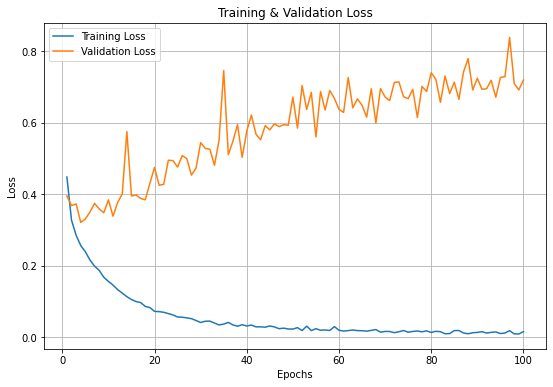

In [17]:
# Loss Visualization
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel( 'Loss' )
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [18]:
# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.8254 - accuracy: 0.8835
Loss = 0.82545
Accuracy = 0.88350


> ## 6) Model Predict

In [19]:
# Proability
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1, :]))

[[0.          0.          0.          0.          0.          0.000000051 0.          0.000000407 0.          0.9999995  ]]


In [20]:
# Class
print(mnist.predict_classes(X_test[:1, :]))

[9]


# IV. Early Stopping

In [53]:
# Session Clear
from keras import backend as K

K.clear_session()

> ## 1) Model Define & Compile

In [54]:
from keras import models
from keras import layers

In [55]:
mnist = models.Sequential(name = 'EarlyStopping')
mnist.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.Dense(128))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.Dense(10, activation = 'softmax'))

mnist.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])


> ## 2) EarlyStopping()

In [56]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 25,
                   verbose = 1)

> ## 3) ModelCheckpoint()

In [57]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_fashion.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

In [58]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                         epochs = 100,
                         batch_size = 128,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/100
375/375 [==============================] - 8s 19ms/step - loss: 0.0458 - accuracy: 0.6615 - val_loss: 0.0242 - val_accuracy: 0.8331
Epoch 2/100
375/375 [==============================] - 7s 18ms/step - loss: 0.0264 - accuracy: 0.8203 - val_loss: 0.0222 - val_accuracy: 0.8462
Epoch 3/100
375/375 [==============================] - 7s 18ms/step - loss: 0.0235 - accuracy: 0.8406 - val_loss: 0.0192 - val_accuracy: 0.8652
Epoch 4/100
375/375 [==============================] - 7s 18ms/step - loss: 0.0223 - accuracy: 0.8504 - val_loss: 0.0191 - val_accuracy: 0.8699
Epoch 5/100
375/375 [==============================] - 7s 18ms/step - loss: 0.0211 - accuracy: 0.8572 - val_loss: 0.0192 - val_accuracy: 0.8654
Epoch 6/100
375/375 [==============================] - 7s 18ms/step - loss: 0.0202 - accuracy: 0.8616 - val_loss: 0.0182 - val_accuracy: 0.8746
Epoch 7/100
375/375 [==============================] - 7s 18ms/step - loss: 0.0196 - accuracy: 0.8669 - val_loss: 0.0182 - val_accuracy:

> ## 5) Best Model

In [59]:
!ls -l

total 4528
-rw-r--r-- 1 root root 4629328 Mar 19 09:24 best_fashion.h5
drwxr-xr-x 1 root root    4096 Mar  5 14:37 sample_data


> ## 6) Model Evaluate

In [64]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss = {loss:.5f} \nAccuracy = {accuracy:.5f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0167 - accuracy: 0.8945
Loss = 0.01672 
Accuracy = 0.89450
